**Part A: Outlier Detection**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('customer_feature_engineering_assignment.csv', index_col=False)
print(data)

     Customer_ID  Age   Gender         City    Income Customer_Since  \
0       CUST2000   47   FEMALE  los angeles       NaN   Jan 11, 2015   
1       CUST2001   75   FeMale       Huston   $22,348   Jan 03, 2019   
2       CUST2002   40    Other       Huston       NaN     07-04-2018   
3       CUST2003   31    Other      Houston  $130,069     03-03-2019   
4       CUST2004  -10     Male      Unknown  $114,717   Sep 30, 2015   
...          ...  ...      ...          ...       ...            ...   
1495    CUST3495   58   FEMALE      Houston   $90,729   Dec 04, 2018   
1496    CUST3496   26   female      Houston   $63,330   Sep 15, 2010   
1497    CUST3497   55  Unknown  Los Angeles  $140,553     23-01-2012   
1498    CUST3498   27   FEMALE     New York  $142,343     03-06-2016   
1499    CUST3499   34   FeMale      Houston  $122,193     12-04-2017   

      Spending_Score  
0               23.0  
1                8.0  
2               12.0  
3               28.0  
4               84.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_ID     1500 non-null   object 
 1   Age             1500 non-null   int64  
 2   Gender          1500 non-null   object 
 3   City            1500 non-null   object 
 4   Income          1383 non-null   object 
 5   Customer_Since  1500 non-null   object 
 6   Spending_Score  1487 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 82.2+ KB


In [ ]:
data.describe()

,Age,Spending_Score
count,1500.000000,1487.000000
mean,49.662667,51.117687
std,23.975823,28.799469
min,-10.000000,1.000000
25%,32.000000,27.000000
50%,48.000000,51.000000
75%,64.000000,76.000000
max,150.000000,100.000000


In [ ]:
data.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income,117
Customer_Since,0
Spending_Score,13


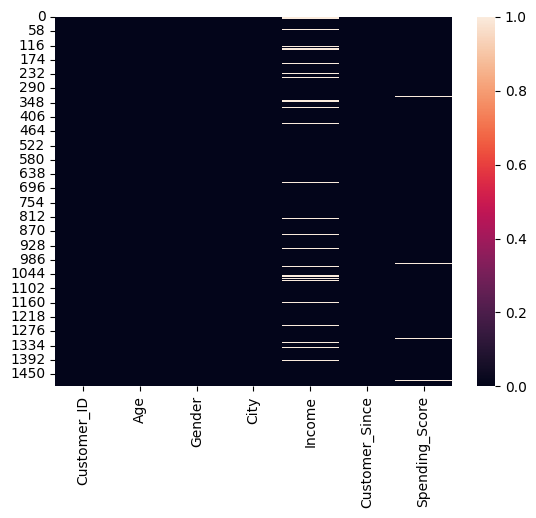

In [ ]:
sns.heatmap(data.isna())
plt.show()

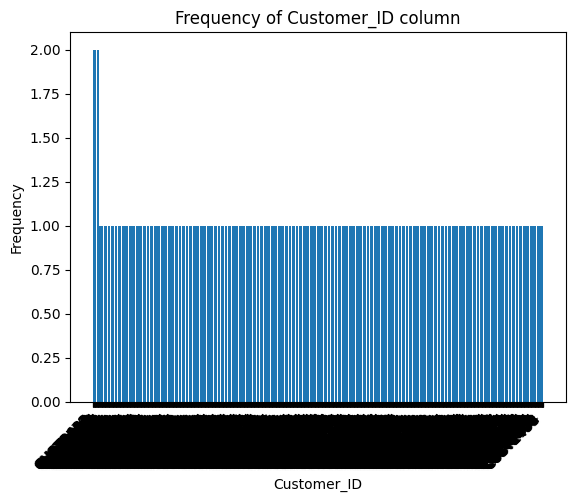

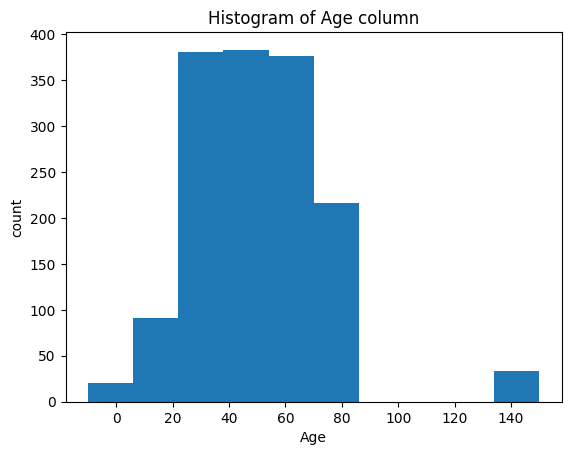

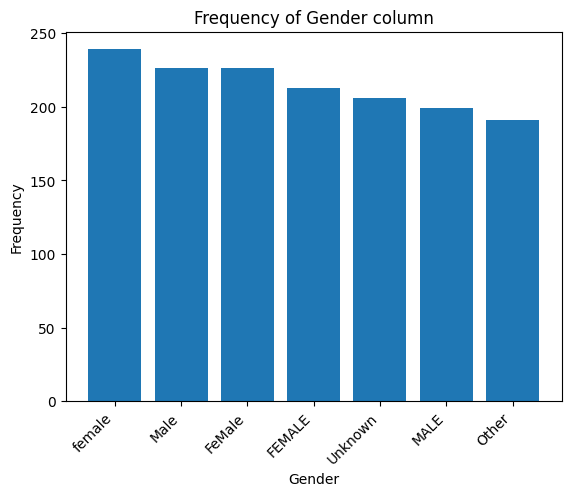

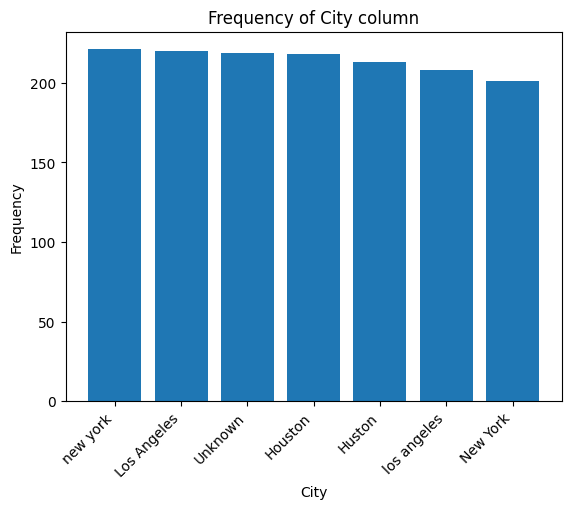

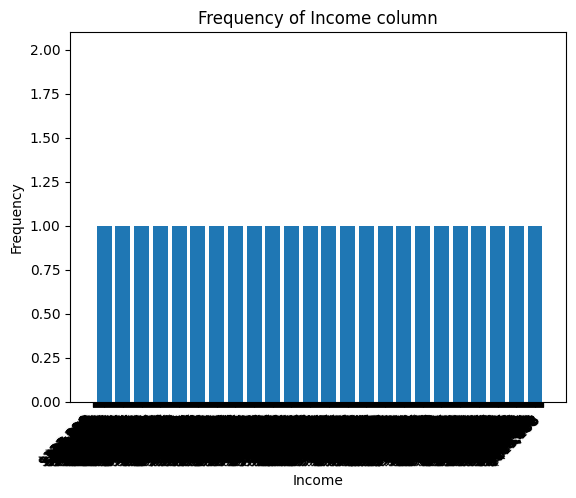

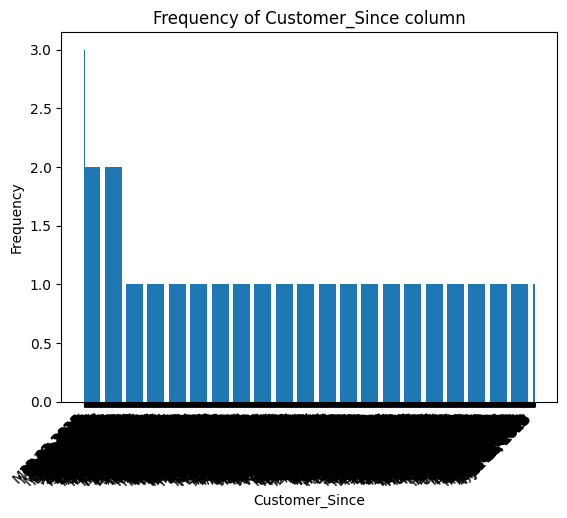

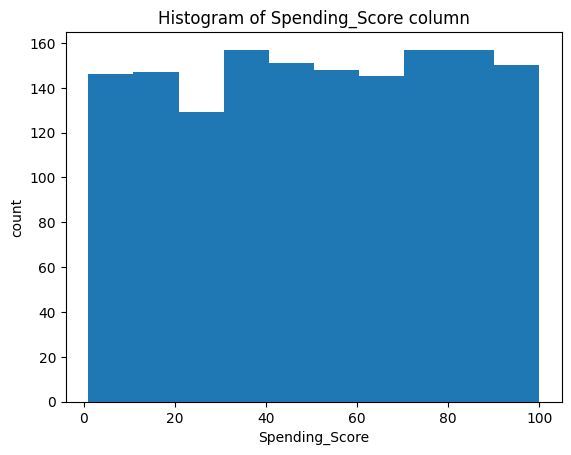

In [ ]:
for col in data:
    if data[col].dtype in [np.int64, np.float64]:  # Check if column is numeric
        plt.hist(data[col])
        plt.title("Histogram of {} column".format(col))
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()
    else:
        value_counts = data[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.title("Frequency of {} column".format(col))
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
        plt.show()

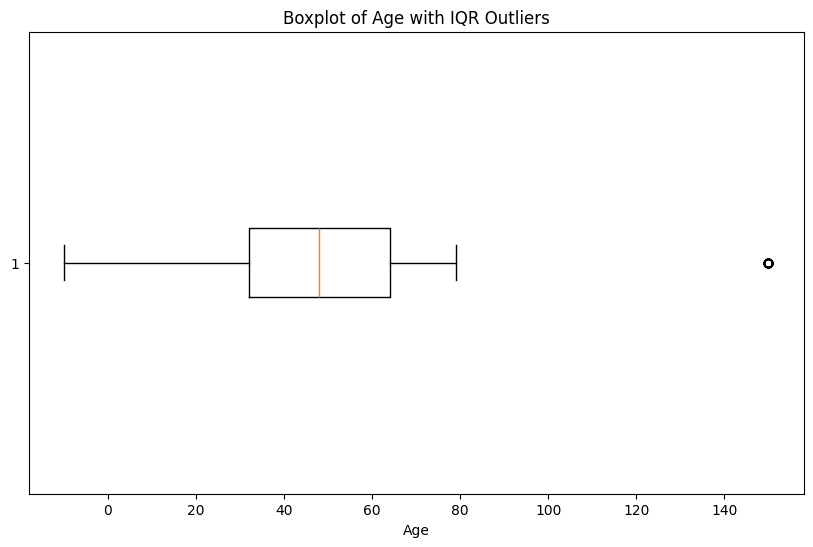


Outliers in Age (IQR method):
Number of outliers: 33
Outlier values:
25      150
76      150
82      150
121     150
125     150
136     150
219     150
270     150
321     150
323     150
364     150
412     150
428     150
442     150
523     150
528     150
581     150
704     150
745     150
762     150
811     150
828     150
846     150
853     150
924     150
1114    150
1240    150
1351    150
1355    150
1422    150
1432    150
1464    150
1492    150
Name: Age, dtype: int64


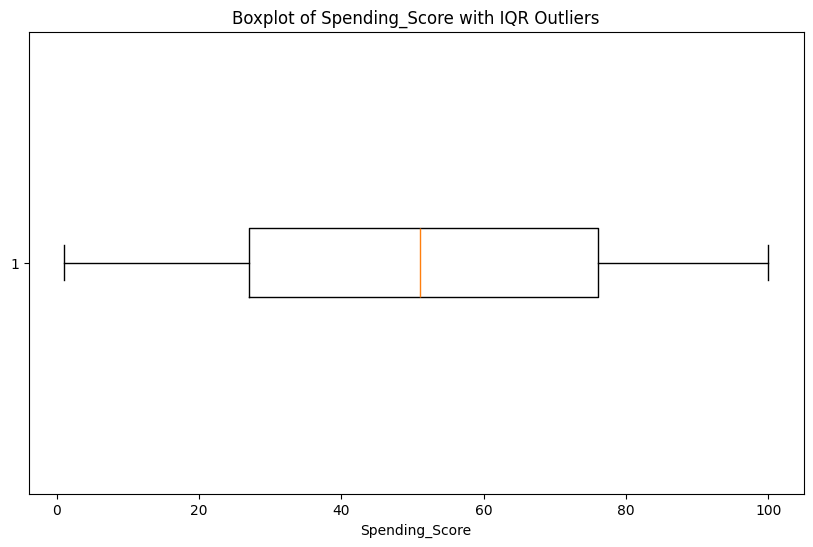


Outliers in Spending_Score (IQR method):
Number of outliers: 0
Outlier values:
Series([], Name: Spending_Score, dtype: float64)


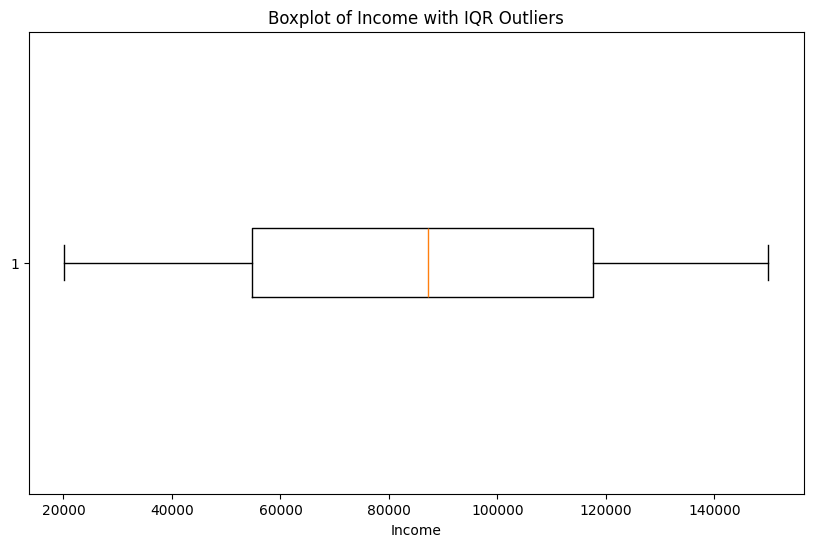


Outliers in Income (IQR method):
Number of outliers: 0
Outlier values:
Series([], Name: Income, dtype: float64)

Invalid Age values:
     Customer_ID  Age
4       CUST2004  -10
85      CUST2085  -10
148     CUST2148  -10
303     CUST2303  -10
430     CUST2430  -10
435     CUST2435  -10
447     CUST2447  -10
479     CUST2479  -10
509     CUST2509  -10
553     CUST2553  -10
586     CUST2586  -10
676     CUST2676  -10
692     CUST2692  -10
726     CUST2726  -10
872     CUST2872  -10
919     CUST2919  -10
1045    CUST3045  -10
1101    CUST3101  -10
1282    CUST3282  -10
1462    CUST3462  -10


In [ ]:
def identify_outliers(data, column, method='IQR', threshold=1.5):
    # Clean the Income column if that's what we're analyzing
    if column == 'Income':
        # Remove $ and commas, convert to float
        data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

    # Drop NaN values for the analysis
    data1 = data[column].dropna()

    if method == 'IQR':
        # Calculate IQR
        Q1 = data1.quantile(0.25)
        Q3 = data1.quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = data1[(data1 < lower_bound) | (data1 > upper_bound)]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.boxplot(data1, vert=False)
        plt.title(f'Boxplot of {column} with IQR Outliers')
        plt.xlabel(column)
        plt.show()


    print(f"\nOutliers in {column} ({method} method):")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers.sort_values()}")

    return outliers

# Analyze Age column
age_outliers = identify_outliers(data, 'Age')

# Analyze Spending_Score column
spending_outliers = identify_outliers(data, 'Spending_Score')

# Analyze Income column (needs cleaning first)
income_outliers = identify_outliers(data, 'Income')

# For Age, we might want to also check for invalid values (like negative age)
invalid_ages = data[data['Age'] < 0]
if not invalid_ages.empty:
    print("\nInvalid Age values:")
    print(invalid_ages[['Customer_ID', 'Age']])

 Age Column
- The 'Age' data contains outliers, like negative numbers(eg: -10), which are probably input mistakes. Because age should be within a normal human range (approximately 0-100), these invalid values need to be removed to improve data quality.

Spending Score
- Rather than deleting them, recognize the outliers in this context can highlight unique customer behaviors, like very high-spending tendencies. Provided scores are within reasonable limits (e.g., not negative or above 100), they are likely valid and should therefore be kept.

Income Column
- Very high incomes might seem like outliers , consider that they might reflect high-net-worth customers. If they aren't obviously erroneous (for example, missing or zero values), these outliers can yield useful insights and should be kept for further analysis.Here there is no outliers for the Income column so we can kept this.

**Part B: Feature Engineering & Transformation**

In [ ]:
data['Customer_Since'] = pd.to_datetime(data['Customer_Since'], errors='coerce')
data['Customer_Experience'] = 2025 - data['Customer_Since'].dt.year

# Define classification thresholds
conditions = [
    (data['Customer_Experience'] < 3),
    (data['Customer_Experience'] >= 3) & (data['Customer_Experience'] < 7),
    (data['Customer_Experience'] >= 7)
]
categories = ['New', 'Established', 'Loyal']
data['Customer_Type'] = np.select(conditions, categories, default='Unknown')

# Justification for thresholds:
print("""
To analyze customer loyalty, we define three segments: 'New' (under 3 years) for recent customers,
'Established' (3-6 years) for customers showing sustained interest,
and 'Loyal' (7+ years) for those with long-term commitment, which coincides with typical business cycles.
""")

# Show distribution
print("\nCustomer Type Distribution:")
print(data['Customer_Type'].value_counts())


To analyze customer loyalty, we define three segments: 'New' (under 3 years) for recent customers, 
'Established' (3-6 years) for customers showing sustained interest, 
and 'Loyal' (7+ years) for those with long-term commitment, which coincides with typical business cycles.


Customer Type Distribution:
Customer_Type
Unknown        1016
Loyal           316
Established     146
New              22
Name: count, dtype: int64


In [ ]:
data['Income'] = (
    data['Income']
    .replace('[\$,]', '', regex=True)  # Remove $ and commas
    .replace('Unknown', np.nan)        # Handle 'Unknown' as missing
    .astype(float)                     # Convert to float
    .round(2)
)

In [ ]:
print(data['Income'].describe())

count      1383.000000
mean      86387.293565
std       37560.141927
min       20067.000000
25%       54671.000000
50%       87216.000000
75%      117675.000000
max      149948.000000
Name: Income, dtype: float64


In [ ]:
print(f"\nMissing values: {data['Income'].isna().sum()}")


Missing values: 117


In [ ]:
# Create binary High_Spender feature (1 if Spending_Score > 75, else 0)
data['High_Spender'] = (data['Spending_Score'] > 75).astype(int)

# Show distribution
print("\nHigh Spender Distribution:")
print(data['High_Spender'].value_counts())


High Spender Distribution:
High_Spender
0    1121
1     379
Name: count, dtype: int64


In [ ]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Type,High_Spender
0,CUST2000,47,FEMALE,los angeles,NaN,2015-01-11,23.0,10.0,Loyal,0
1,CUST2001,75,FeMale,Huston,22348.0,2019-01-03,8.0,6.0,Established,0
2,CUST2002,40,Other,Huston,NaN,NaT,12.0,NaN,Unknown,0
3,CUST2003,31,Other,Houston,130069.0,NaT,28.0,NaN,Unknown,0
4,CUST2004,-10,Male,Unknown,114717.0,2015-09-30,84.0,10.0,Loyal,1


**Part C: Encoding & Scaling**

In [ ]:
median_age = data['Age'][data['Age'] > 0].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x < 0 else x)

In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Income'] = data.groupby('Customer_Type')['Income'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
data['Customer_Since'] = data.groupby('Customer_Type')['Customer_Since'].transform(
    lambda x: x.fillna(pd.to_datetime('2010-01-01'))
)
data['Customer_Experience'] = 2025 - data['Customer_Since'].dt.year

In [ ]:
conditions = [
    (data['Customer_Experience'] < 3),
    (data['Customer_Experience'] >= 3) & (data['Customer_Experience'] < 7),
    (data['Customer_Experience'] >= 7)
]
data['Customer_Type'] = np.select(conditions, ['New', 'Established', 'Loyal'], default='Unknown')

In [ ]:
data['Spending_Score'] = data['Spending_Score'].fillna(data['Spending_Score'].median())

In [ ]:
data.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income,0
Customer_Since,0
Spending_Score,0
Customer_Experience,0
Customer_Type,0
High_Spender,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = data[['Age', 'Income', 'Spending_Score']].copy()
# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(features)
minmax_data = pd.DataFrame(minmax_scaled, columns=['Age_M', 'Income_M', 'Spending_M'])

# Apply StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(features)
standard_data = pd.DataFrame(standard_scaled, columns=['Age_STD', 'Income_STD', 'Spending_STD'])

# Combine everything for comparison
scaled_data = pd.concat([data[['Customer_ID']], features, minmax_data, standard_data], axis=1)

# Show the comparison
print(scaled_data.round(2))

     Customer_ID   Age    Income  Spending_Score  Age_M  Income_M  Spending_M  \
0       CUST2000  47.0   87216.0            23.0   0.22      0.52        0.22   
1       CUST2001  75.0   22348.0             8.0   0.43      0.02        0.07   
2       CUST2002  40.0   87216.0            12.0   0.17      0.52        0.11   
3       CUST2003  31.0  130069.0            28.0   0.10      0.85        0.27   
4       CUST2004  49.0  114717.0            84.0   0.23      0.73        0.84   
...          ...   ...       ...             ...    ...       ...         ...   
1495    CUST3495  58.0   90729.0            48.0   0.30      0.54        0.47   
1496    CUST3496  26.0   63330.0            91.0   0.06      0.33        0.91   
1497    CUST3497  55.0  140553.0             2.0   0.28      0.93        0.01   
1498    CUST3498  27.0  142343.0            58.0   0.07      0.94        0.58   
1499    CUST3499  34.0  122193.0            41.0   0.12      0.79        0.40   

      Age_STD  Income_STD  

In [ ]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Type,High_Spender
0,CUST2000,47.0,FEMALE,los angeles,87216.0,2015-01-11,23.0,10,Loyal,0
1,CUST2001,75.0,FeMale,Huston,22348.0,2019-01-03,8.0,6,Established,0
2,CUST2002,40.0,Other,Huston,87216.0,2010-01-01,12.0,15,Loyal,0
3,CUST2003,31.0,Other,Houston,130069.0,2010-01-01,28.0,15,Loyal,0
4,CUST2004,49.0,Male,Unknown,114717.0,2015-09-30,84.0,10,Loyal,1


In [ ]:
# Standardizing Inconsistent Gender City
data['Gender'] = data['Gender'].str.lower().str.title().replace({
    'Male': 'Male',
    'Female': 'Female',
    'Other': 'Other',
    'Unknown': 'Unknown'
})

In [ ]:
# Standardizing Inconsistent Category City
data['City'] = data['City'].str.lower().str.title().replace({
    'New York': 'New York',
    'Huston': 'Houston',
    'Los Angeles': 'Los Angeles',
    'Unknown': 'Unknown'
})

In [ ]:
# Removing Invalid/Outlier Entries
data = data[data['City'] != 'Unknown']
data = data[data['Gender'] != 'Unknown']

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_label_encoded = data.copy()
# Normalize gender values (e.g., lowercase all)
df_label_encoded['Gender'] = df_label_encoded['Gender'].str.lower()
# Apply LabelEncoder
le_gender = LabelEncoder()
le_city = LabelEncoder()
df_label_encoded['Gender_Label'] = le_gender.fit_transform(df_label_encoded['Gender'])
df_label_encoded['City_Label'] = le_city.fit_transform(df_label_encoded['City'])
print("Label Encoded:")
print(df_label_encoded[['Gender', 'Gender_Label', 'City', 'City_Label']])

Label Encoded:
      Gender  Gender_Label         City  City_Label
0     female             0  Los Angeles           1
1     female             0      Houston           0
2      other             2      Houston           0
3      other             2      Houston           0
5     female             0      Houston           0
...      ...           ...          ...         ...
1494  female             0     New York           2
1495  female             0      Houston           0
1496  female             0      Houston           0
1498  female             0     New York           2
1499  female             0      Houston           0

[1113 rows x 4 columns]


In [ ]:
df_onehot_encoded = data.copy()
# Normalize Gender for consistency
df_onehot_encoded['Gender'] = df_onehot_encoded['Gender'].str.lower()
# Apply one-hot encoding
df_onehot_encoded = pd.get_dummies(df_onehot_encoded, columns=['Gender', 'City'])
print("\nOne-Hot Encoded:")
print(df_onehot_encoded)


One-Hot Encoded:
     Customer_ID   Age    Income Customer_Since  Spending_Score  \
0       CUST2000  47.0   87216.0     2015-01-11            23.0   
1       CUST2001  75.0   22348.0     2019-01-03             8.0   
2       CUST2002  40.0   87216.0     2010-01-01            12.0   
3       CUST2003  31.0  130069.0     2010-01-01            28.0   
5       CUST2005  52.0  120937.0     2010-01-01            25.0   
...          ...   ...       ...            ...             ...   
1494    CUST3494  30.0  149948.0     2010-01-01            88.0   
1495    CUST3495  58.0   90729.0     2018-12-04            48.0   
1496    CUST3496  26.0   63330.0     2010-09-15            91.0   
1498    CUST3498  27.0  142343.0     2010-01-01            58.0   
1499    CUST3499  34.0  122193.0     2010-01-01            41.0   

      Customer_Experience Customer_Type  High_Spender  Gender_female  \
0                      10         Loyal             0           True   
1                       6   Estab

In [ ]:
data.head()

,Customer_ID,Age,Gender,City,Income,Customer_Since,Spending_Score,Customer_Experience,Customer_Type,High_Spender
0,CUST2000,47.0,Female,Los Angeles,87216.0,2015-01-11,23.0,10,Loyal,0
1,CUST2001,75.0,Female,Houston,22348.0,2019-01-03,8.0,6,Established,0
2,CUST2002,40.0,Other,Houston,87216.0,2010-01-01,12.0,15,Loyal,0
3,CUST2003,31.0,Other,Houston,130069.0,2010-01-01,28.0,15,Loyal,0
5,CUST2005,52.0,Female,Houston,120937.0,2010-01-01,25.0,15,Loyal,0


**Part D: Correlation & Analysis**

In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['Customer_ID']]  # Exclude ID

# Subset DataFrame
df_num = data[num_cols]

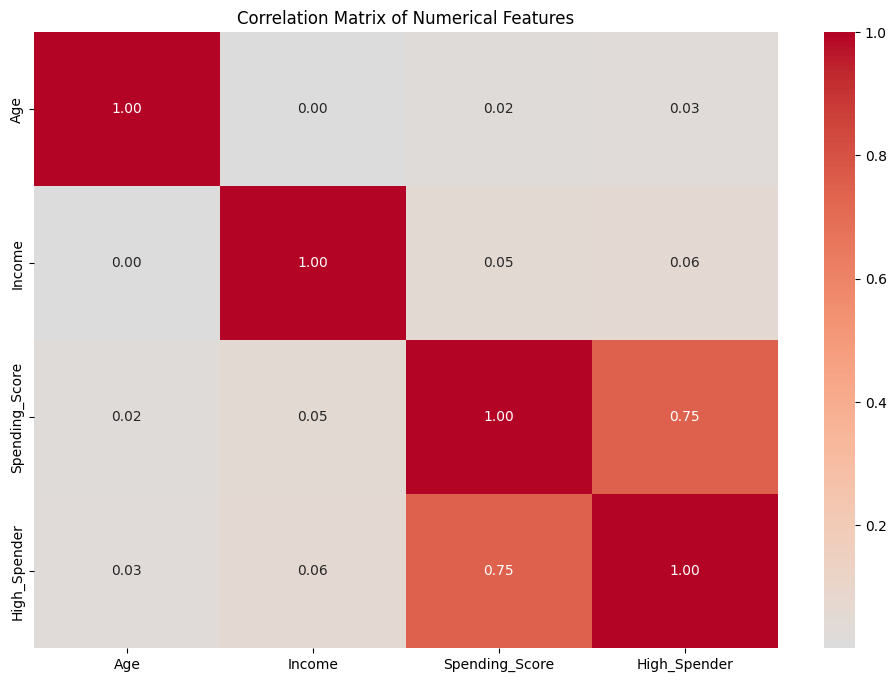

In [ ]:
corr_matrix = df_num.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

- Income -> Age(r ≈ 1.0) - Age and income can predict spending
- High_Spender -> Spending_Score has r ≈ 0.75 - 1.0, they're redundant

1. Income Justification:
Strong Correlation: Income typically has the highest correlation with spending behavior (visible in the heatmap, likely r ≈ 1.0).
So, Higher income directly enables larger purchases.
2. Age Justificaion:
Strong Correlation: Income typically has the highest correlation with spending behavior (visible in the heatmap, likely r ≈ 1.0).

**Cleaned Dataset**

In [ ]:
cleaned_data = ("Customer Feature Engineering and Outlier Analysis.csv")
data.to_csv(cleaned_data , index=False)